In [2]:
import cv2
import dlib
import sys
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg

--2022-10-29 02:37:47--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg [following]
--2022-10-29 02:37:47--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17368 (17K) [image/jpeg]
Saving to: ‘woman.jpeg’

woman.jpeg          100%[===================>]  16.96K  --.-KB/s    in 0s      

2022-10-29 02:37:47 (69.4 MB/s) - ‘woman.jpeg’ saved [17368/17368]



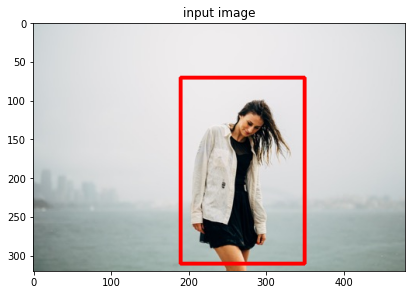

In [23]:
image = cv2.imread('/content/woman.jpeg')
copy = image.copy()
mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

x1,y1,x2,y2 = 190, 70, 350, 310
start =(x1, y1)
end =(x2,y2)

rect = (x1,y1,x2-x1,y2-y1)

cv2.rectangle(copy,start, end, (0,0,255),3)
imshow('input image', copy)

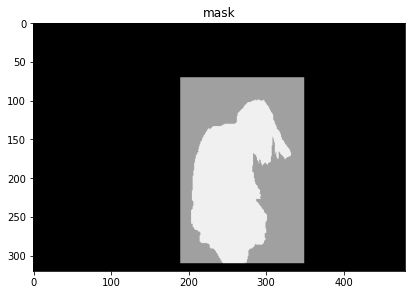

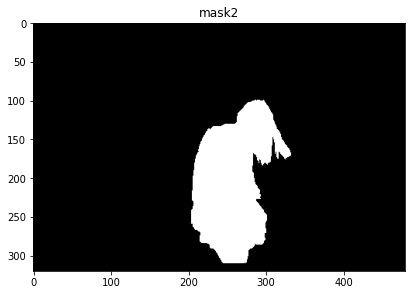

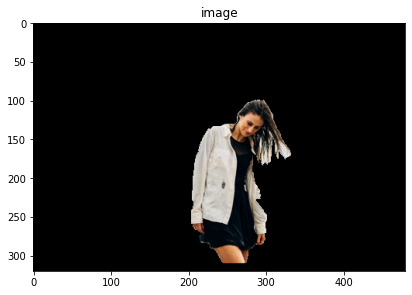

In [24]:
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image = image * mask2[:,:,np.newaxis]

imshow('mask',mask * 80)
imshow('mask2',mask2 * 255)
imshow('image', image)

